## NEURONAL NETWORK PRUEBA 1
PROYECTO DE GESTIÓN DE REDES - Gestión de redes IoT

In [9]:
import pandas as pd
import os

# Definir rutas de las carpetas
test_path = "Test_Prueba1"
train_path = "Train_Prueba1"

# Cargar archivos de prueba
test_files = {
    "ARP_Spoofing": "ARP_Spoofing_test.csv",
    "Benign": "Benign_test.csv",
    "DDoS": "DDoS_test.csv",
    "DoS": "DoS_test.csv",
    "MQTT": "MQTT_test.csv",
    "Recon": "Recon_test.csv"
}

test_data = {name: pd.read_csv(os.path.join(test_path, file)) for name, file in test_files.items()}

# Cargar archivos de entrenamiento
train_files = {
    "Benign": "Benign_train.csv",
    "DDoS": "DDoS_train.csv",
    "DoS": "DoS_train.csv",
    "MQTT": "MQTT_train.csv",
    "Recon": "Recon_train.csv",
    "ARP_Spoofing": "Spoofing_train.csv"
}

train_data = {name: pd.read_csv(os.path.join(train_path, file)) for name, file in train_files.items()}

In [10]:
# Acceder a un DataFrame 
df_analizar = test_data["Benign"]
df_analizar.head()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Attack_Label
0,319606.0,6.0,64.0,1.366686,1.366686,0.0,0.0,0.0,0.0,0.5,...,16.262070,77.3,1.694702e+08,13.5,12.663093,23.013372,265.175418,1.0,244.6,Benign
1,33109.3,6.0,64.0,1.576552,1.576552,0.0,0.0,0.0,0.0,0.5,...,14.232702,81.3,1.513958e-04,5.5,12.476242,20.128080,236.705162,0.9,38.5,Benign
2,22840.1,6.0,64.0,0.303351,0.303351,0.0,0.0,0.0,0.0,1.0,...,8.935370,88.4,8.418560e-05,5.5,13.286643,12.636522,105.067650,0.9,38.5,Benign
3,240123.2,6.0,64.0,2.033665,2.033665,0.0,0.0,0.0,0.0,0.5,...,17.569529,80.5,1.694705e+08,13.5,12.793984,24.861021,309.436651,1.0,244.6,Benign
4,236089.2,6.0,69.9,0.911873,0.911873,0.0,0.0,0.0,0.0,0.5,...,15.417590,76.3,1.694698e+08,13.5,12.598301,21.815770,238.560331,1.0,244.6,Benign


In [11]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Unir los DataFrames de entrenamiento y prueba
train_df = pd.concat(train_data.values(), ignore_index=True)
test_df = pd.concat(test_data.values(), ignore_index=True)

# Separar características y etiquetas
X_train = train_df.drop(columns=['Attack_Label'])
y_train = train_df['Attack_Label']
X_test = test_df.drop(columns=['Attack_Label'])
y_test = test_df['Attack_Label']

# Codificar las etiquetas
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir la red neuronal
model = keras.Sequential([
    keras.layers.Dense(256, activation='tanh', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='tanh'),
    keras.layers.Dense(64, activation='tanh'),
    keras.layers.Dense(32, activation='tanh'),
    keras.layers.Dense(len(np.unique(y_train)), activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))


# Hacer predicciones
y_pred_probs = model.predict(X_test)  # Predicciones en probabilidades
y_pred = np.argmax(y_pred_probs, axis=1)  # Convertir a clases

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Promedio ponderado
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Mostrar resultados
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

# Mejores parámetros: {'batch_size': 16, 'epochs': 50, 'model__activation': 'tanh', 'model__neurons1': 128, 'model__neurons2': 64, 'model__optimizer': 'rmsprop'}
#Mejor precisión: 0.7782

Epoch 1/50


c:\Users\itsal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1784/1784 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6936 - loss: 0.6620 - val_accuracy: 0.7623 - val_loss: 0.5166
Epoch 2/50
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7480 - loss: 0.5109 - val_accuracy: 0.7708 - val_loss: 0.5016
Epoch 3/50
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7692 - loss: 0.4769 - val_accuracy: 0.7859 - val_loss: 0.4686
Epoch 4/50
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7755 - loss: 0.4637 - val_accuracy: 0.7757 - val_loss: 0.4699
Epoch 5/50
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7787 - loss: 0.4573 - val_accuracy: 0.7707 - val_loss: 0.4726
Epoch 6/50
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7788 - loss: 0.4518 - val_accuracy: 0.7855 - val_loss: 0.4685
Epoch 7/50
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7843 - loss: 0.4428 - val_accuracy: 0.7750 - val_loss: 0.4837
Epoch 8/50
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7857 - loss: 0.4436 - val_accurac

232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


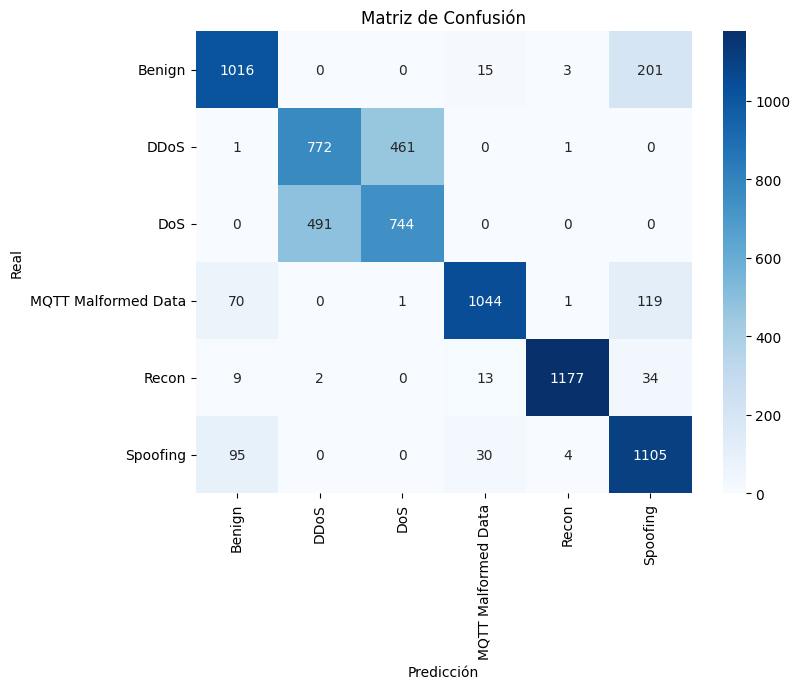

                     precision    recall  f1-score   support

             Benign       0.85      0.82      0.84      1235
               DDoS       0.61      0.63      0.62      1235
                DoS       0.62      0.60      0.61      1235
MQTT Malformed Data       0.95      0.85      0.89      1235
              Recon       0.99      0.95      0.97      1235
           Spoofing       0.76      0.90      0.82      1234

           accuracy                           0.79      7409
          macro avg       0.80      0.79      0.79      7409
       weighted avg       0.80      0.79      0.79      7409



In [12]:

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generar predicciones
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Reporte de clasificación
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

In [ ]:
import numpy as np
import tensorflow as tf
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Instalar scikeras si no está presente
import subprocess
import sys
try:
    from scikeras.wrappers import KerasClassifier
except ModuleNotFoundError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "scikeras"])
    from scikeras.wrappers import KerasClassifier

# Definir función para crear el modelo
def create_model(neurons1=128, neurons2=64, activation='relu', optimizer='adam'):
    model = keras.Sequential([
        keras.layers.Dense(neurons1, activation=activation, input_shape=(X_train.shape[1],)),
        keras.layers.Dense(neurons2, activation=activation),
        keras.layers.Dense(len(np.unique(y_train)), activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Definir el clasificador de Keras
model = KerasClassifier(model=create_model, verbose=0)

# Definir la grilla de hiperparámetros
param_grid = {
    'model__neurons1': [64, 128, 256],
    'model__neurons2': [32, 64, 128],
    'model__activation': ['relu', 'tanh'],
    'model__optimizer': ['adam', 'rmsprop'],
    'batch_size': [8, 16],
    'epochs': [30, 50]
}

# Realizar GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

# Imprimir los mejores parámetros
print(f'Mejores parámetros: {grid_result.best_params_}')
print(f'Mejor precisión: {grid_result.best_score_:.4f}')